In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)
            #
        return image

# Define the transformation for resizing
resize_transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Grayscale()
])

# dataset_path = r"D:\IITK\PClub\ML_Spring_Camp_Task\Autoencoder\Chess\King"
dataset_path = r"Chess\Rook"

custom_dataset = CustomDataset(root_dir=dataset_path, transform=resize_transform)

loader = torch.utils.data.DataLoader(dataset = custom_dataset, batch_size = 32, shuffle = True)

In [3]:
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9)
		)
		
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


In [4]:
model = AE()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)


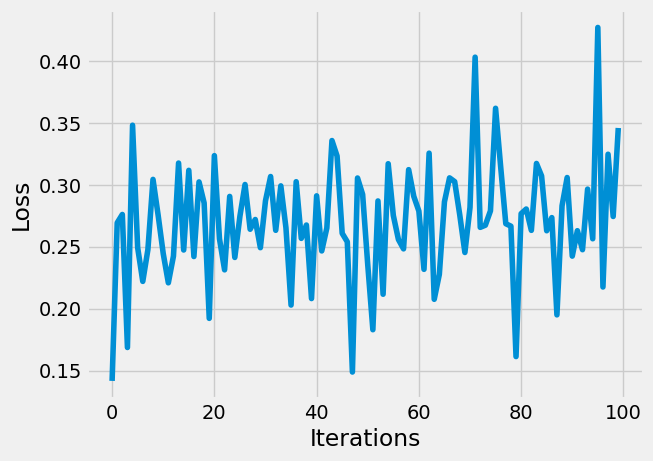

In [5]:
epochs = 25
outputs = []
losses = []
for epoch in range(epochs):
	for image in loader:
		image = image.reshape(-1, 28*28)
		reconstructed = model(image)
		loss = loss_function(reconstructed, image)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		losses.append(loss)
	outputs.append((epochs, image, reconstructed))

plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(torch.tensor(losses[-100:]).detach().numpy())

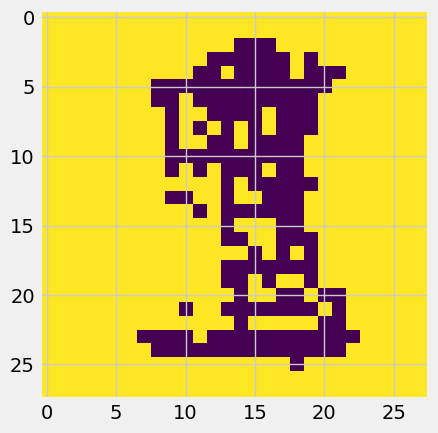

In [6]:
for i, item in enumerate(image):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0].detach().numpy())

for i, item in enumerate(reconstructed):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0].detach().numpy())